# Funnul Analysis

## Goal

The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that leads to conversion is called ‘funnel’ .

Data Science can have a tremendous impact on funnel optimization. 
Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience as well as it often allows to discover bugs.

## Challenge

You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:

The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

From the home page, the user can perform a search and land on the search page.

From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.

If she does decide to buy, she ends up on the confirmation page

The company CEO isn’t very happy with the company sales and, especially, sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you can create hypotheses on how conversion rate could be improved.

Specifically, she is interested in :

* A full picture of funnel conversion rate for both desktop and mobile

* Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

# Loading Data

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df_user = pd.read_csv('user_table.csv')
df_user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [3]:
df_user.shape

(90400, 4)

In [4]:
df_user.user_id.nunique()

90400

In [5]:
df_user.isna().sum()

user_id    0
date       0
device     0
sex        0
dtype: int64

In [6]:
df_home = pd.read_csv('home_page_table.csv')
df_home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [7]:
df_home.shape

(90400, 2)

In [8]:
df_search = pd.read_csv('search_page_table.csv')
df_search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [9]:
df_search.shape

(45200, 2)

In [10]:
df_paying = pd.read_csv('payment_page_table.csv')
df_paying.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [11]:
df_paying.shape

(6030, 2)

In [12]:
df_paid = pd.read_csv('payment_confirmation_table.csv')
df_paid.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [13]:
df_paid.shape

(452, 2)

In [22]:
df = df_user.merge(df_home, how = 'left').rename(columns = {'page': 'home_page'})

In [23]:
df = df.merge(df_search, how = 'left').rename(columns = {'page': 'search'})

In [26]:
df['home_page'] = 1.0

In [27]:
df['search'] = df['search'].apply(lambda x: 1.0 if x == 'search_page' else 0.0)

In [28]:
df = df.merge(df_paying, how = 'left').rename(columns = {'page':'paying'})

In [29]:
df['paying'] = df['paying'].apply(lambda x: 1.0 if x == 'payment_page' else 0.0)

In [30]:
df = df.merge(df_paid, how = 'left').rename(columns = {'page':'paid'})

In [31]:
df['paid'] = df['paid'].apply(lambda x: 1.0 if x == 'payment_confirmation_page' else 0.0)

In [32]:
df.head()

,user_id,date,device,sex,home_page,search,paying,paid
0,450007,2015-02-28,Desktop,Female,1.0,0.0,0.0,0.0
1,756838,2015-01-13,Desktop,Male,1.0,0.0,0.0,0.0
2,568983,2015-04-09,Desktop,Male,1.0,1.0,0.0,0.0
3,190794,2015-02-18,Desktop,Female,1.0,1.0,0.0,0.0
4,537909,2015-01-15,Desktop,Male,1.0,0.0,0.0,0.0


In [33]:
df.describe(include='all')

,user_id,date,device,sex,home_page,search,paying,paid
count,90400.000000,90400,90400,90400,90400.0,90400.000000,90400.000000,90400.000000
unique,NaN,120,2,2,NaN,NaN,NaN,NaN
top,NaN,2015-02-08,Desktop,Male,NaN,NaN,NaN,NaN
freq,NaN,877,60200,45325,NaN,NaN,NaN,NaN
mean,498709.683473,NaN,NaN,NaN,1.0,0.500000,0.066704,0.005000
std,289040.674085,NaN,NaN,NaN,0.0,0.500003,0.249509,0.070534
min,17.000000,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000
25%,247978.750000,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000
50%,498267.000000,NaN,NaN,NaN,1.0,0.500000,0.000000,0.000000
75%,749789.250000,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000


In [34]:
df['date'] = pd.to_datetime(df['date'])

## Question 1

In [35]:
df[['search', 'paying', 'paid']].mean()

search    0.500000
paying    0.066704
paid      0.005000
dtype: float64

In [36]:
df.groupby('device')[['search', 'paying', 'paid']].mean()

,search,paying,paid
device,,,
Desktop,0.5,0.05,0.002492
Mobile,0.5,0.10,0.010000


In [37]:
df.groupby('device')[['search', 'paying', 'paid']].size()

device
Desktop    60200
Mobile     30200
dtype: int64

In [38]:
def conversion_rate(df):
    rates = []
    home_rate = len(df[df['search'] == 1.0]) / len(df[df['home_page'] == 1.0])
    rates.append(home_rate)
    search_rate = len(df[df['paying'] == 1.0]) / len(df[df['search'] == 1.0])
    rates.append(search_rate)
    paying_rate = len(df[df['paid'] == 1.0]) / len(df[df['paying'] == 1.0])
    rates.append(paying_rate)
    
    df_rates = pd.DataFrame({'page':['home','search','paying'],'conversion rates':rates})
    
    return df_rates

In [39]:
df_rates = conversion_rate(df)
df_rates

,page,conversion rates
0,home,0.500000
1,search,0.133407
2,paying,0.074959


In [40]:
df_m = df[df['device'] == 'Mobile']
df_d = df[df['device'] == 'Desktop']

In [41]:
df_m_rates = conversion_rate(df_m)
df_d_rates = conversion_rate(df_d)

In [42]:
df_m_rates
df_d_rates

,page,conversion rates
0,home,0.5
1,search,0.2
2,paying,0.1


,page,conversion rates
0,home,0.500000
1,search,0.100000
2,paying,0.049834


<AxesSubplot:xlabel='date'>

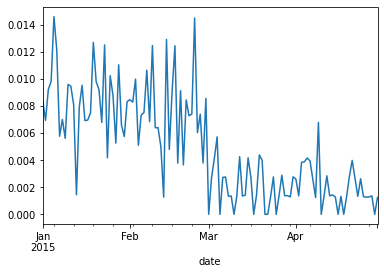

In [43]:
df.groupby('date')['paid'].mean().plot()

It looks like there is a drastic drop happening around the beginning of March.

Let's check whether the drop is caused by mobile users or by device users.

<Figure size 1080x432 with 0 Axes>

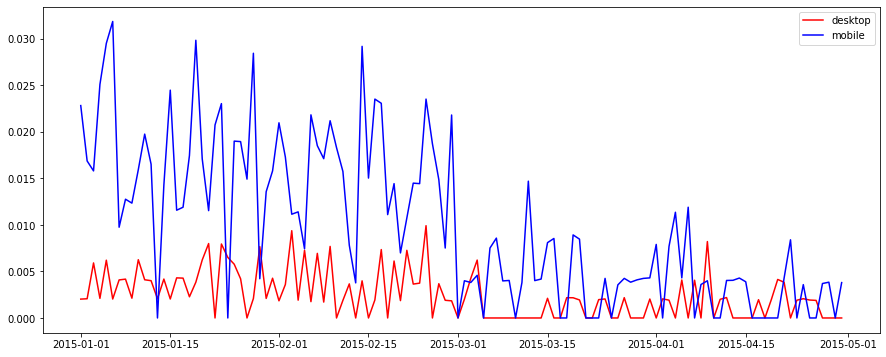

In [71]:
a = df[df['device'] == 'Desktop'].groupby(['date'])['paid'].mean()
b = df[df['device'] == 'Mobile'].groupby(['date'])['paid'].mean()
plt.figure(figsize = (15,6))
plt.plot(a,'r')
plt.plot(b,'b')
plt.legend(('desktop','mobile'))

Hmm, interesting, it seems the drop is caused by **mobile** users.

<Figure size 1080x432 with 0 Axes>

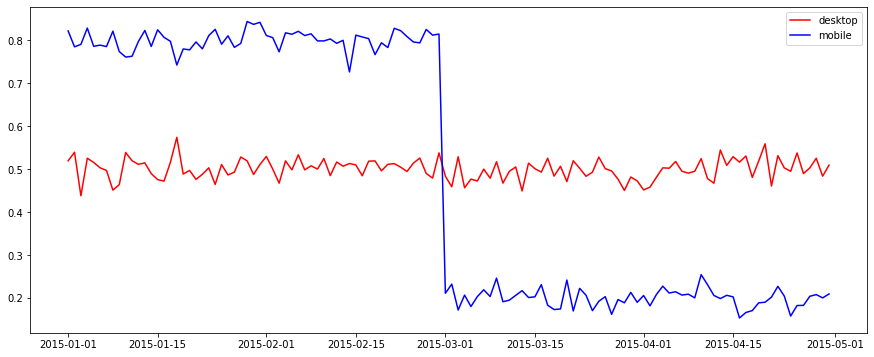

In [72]:
a = df[df['device'] == 'Desktop'].groupby(['date'])['search'].mean()
b = df[df['device'] == 'Mobile'].groupby(['date'])['search'].mean()
plt.figure(figsize = (15,6))
plt.plot(a,'r')
plt.plot(b,'b')
plt.legend(('desktop','mobile'))

The drop seems much more obvious in the search phase. It must be something wrong after 2015-03-01.

## Question 2

In [49]:
from scipy import stats

In [59]:
test = stats.ttest_ind(df[(df['device'] == 'Mobile')]['paid'],
               df[(df['device'] == 'Desktop')]['paid'],
               equal_var = False)

In [60]:
test

Ttest_indResult(statistic=12.358396528457208, pvalue=5.124581644554514e-35)

From the t-test result, we can see that there is a statistically significant difference between mobile users and desktop users.

In [53]:
test = stats.ttest_ind(df[(df['date'] < '2015-03-01')]['paid'],
               df[(df['date'] >= '2015-03-01')]['paid'],
               equal_var = False)

In [54]:
test

Ttest_indResult(statistic=12.837452574917766, pvalue=1.12144488544287e-37)

In [55]:
test = stats.ttest_ind(df[(df['date'] < '2015-03-01') & (df['device'] == 'Desktop')]['paid'],
               df[(df['date'] >= '2015-03-01') & (df['device'] == 'Desktop')]['paid'],
               equal_var = False)

In [56]:
test

Ttest_indResult(statistic=6.378671218084218, pvalue=1.8027245356375694e-10)

In [57]:
test = stats.ttest_ind(df[(df['date'] < '2015-03-01') & (df['device'] == 'Mobile')]['paid'],
               df[(df['date'] >= '2015-03-01') & (df['device'] == 'Mobile')]['paid'],
               equal_var = False)

In [58]:
test

Ttest_indResult(statistic=11.242769245761897, pvalue=3.0348430792552614e-29)

From above t-test results, we can see that there is a statistically significant difference between date before 2015-03-01 and after 2015-03-01.

## Conclusion

1. The conversion rate of mobile users are much higher than that of desktop users. Further investigation is needed regarding the differences of those 2 types of users' user experience.

2. For mobile users, conversion rate before 2015-03-01 is much higher than that after 2015-03-01. Maybe should take a closer look at whether there was a feature updated in 2015-03-01, which had great impact on mobile users.